# 캐글 스터디 01: 타이타닉
## 작성자 : 임동혁
## 날짜: 20210118

### 필사 1.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(font_scale=2.5)
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [21]:
df_train = pd.read_csv('./titanic/train.csv')
df_test = pd.read_csv('./titanic/test.csv')

In [22]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- Survived : 생존여부, int
- Pclass : 1 = 1st, 2 = 2nd, 3 = 3rd, categorical feature, int
- SibSp : 함께 탑승한 형제, 배우자의 수, int
- Parch : 함께 탑승한 부모, 아이의 수, int
- Ticket : 티켓 번호, str
- Fare : 탑승료, float
- Cabin : 객실 번호, str
- Embared : 탑승 항구, C = Cherbourg, Q = Queenstown, S = Southampton, str

- pandas descrive() 메소드는 각 feature가 가진 통계치 반환

In [23]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## 1.1 Null Data Check

In [25]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value : {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value : 0.00%
column:   Survived	 Percent of NaN value : 0.00%
column:     Pclass	 Percent of NaN value : 0.00%
column:       Name	 Percent of NaN value : 0.00%
column:        Sex	 Percent of NaN value : 0.00%
column:        Age	 Percent of NaN value : 19.87%
column:      SibSp	 Percent of NaN value : 0.00%
column:      Parch	 Percent of NaN value : 0.00%
column:     Ticket	 Percent of NaN value : 0.00%
column:       Fare	 Percent of NaN value : 0.00%
column:      Cabin	 Percent of NaN value : 77.10%
column:   Embarked	 Percent of NaN value : 0.22%


In [26]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value : {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value : 0.00%
column:     Pclass	 Percent of NaN value : 0.00%
column:       Name	 Percent of NaN value : 0.00%
column:        Sex	 Percent of NaN value : 0.00%
column:        Age	 Percent of NaN value : 20.57%
column:      SibSp	 Percent of NaN value : 0.00%
column:      Parch	 Percent of NaN value : 0.00%
column:     Ticket	 Percent of NaN value : 0.00%
column:       Fare	 Percent of NaN value : 0.24%
column:      Cabin	 Percent of NaN value : 78.23%
column:   Embarked	 Percent of NaN value : 0.00%


<AxesSubplot:>

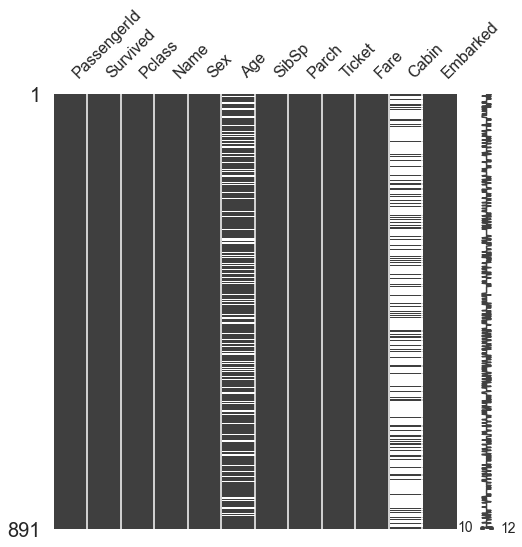

In [27]:
msno.matrix(df = df_train.iloc[:, :], figsize = (8, 8))

<AxesSubplot:>

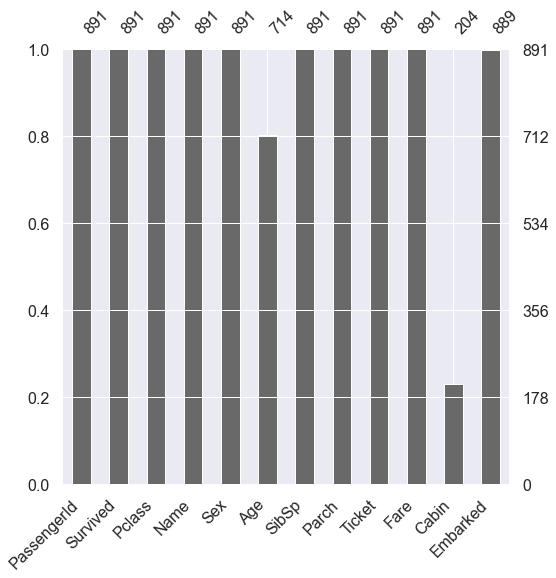

In [28]:
msno.bar(df = df_train.iloc[:, :], figsize = (8, 8))

<AxesSubplot:>

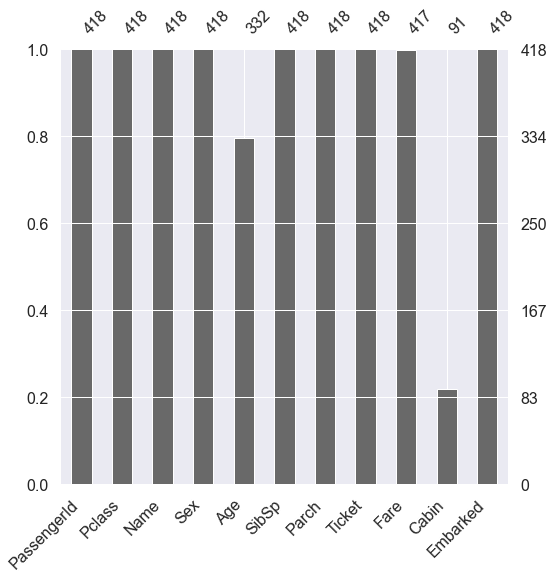

In [29]:
msno.bar(df = df_test.iloc[:, :], figsize = (8, 8))

## 1.2 Target Label 확인
- Target Label 이 어떤 distribution을 가지고 있는지 확인.
- Binary Classification의 경우 1과 0의 분포가 어떤지에 따라 모델의 평가 방법이 달라질 수 있다.

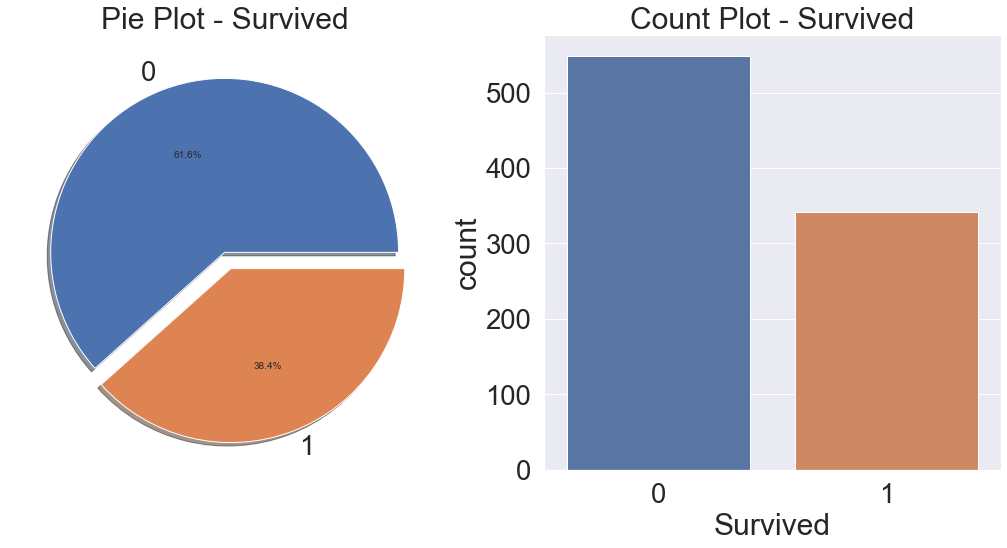

In [30]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))

df_train['Survived'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%', ax = ax[0], shadow = True)
ax[0].set_title('Pie Plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data = df_train, ax = ax[1])
ax[1].set_title('Count Plot - Survived')
plt.show()

- Target Label의 분포가 균일(Balanced)하다. 불균일한 경우 원하는 결과를 얻어내기 힘들 수 있다.

## 2. Exploratory Data Analysis

## 2.1 Pclass
- Pclass는 ordinal, 서수형 데이터. 카테고리이면서 순서가 있다.
- 'Pclass', 'Survived'를 가져온 후 pclass로 묶고 각 pclass마다 0, 1 count의 평균이 pclass별 생존률이다.

- count()는 전체 사람의 수, sum()은 survived = 1인 사람의 수 반환 메서드.

In [31]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [32]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [33]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<AxesSubplot:xlabel='Pclass'>

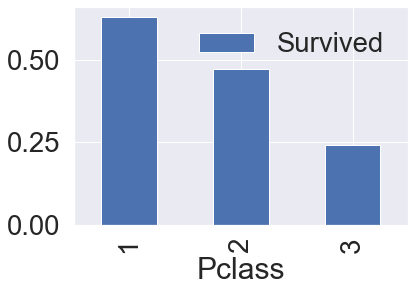

In [34]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

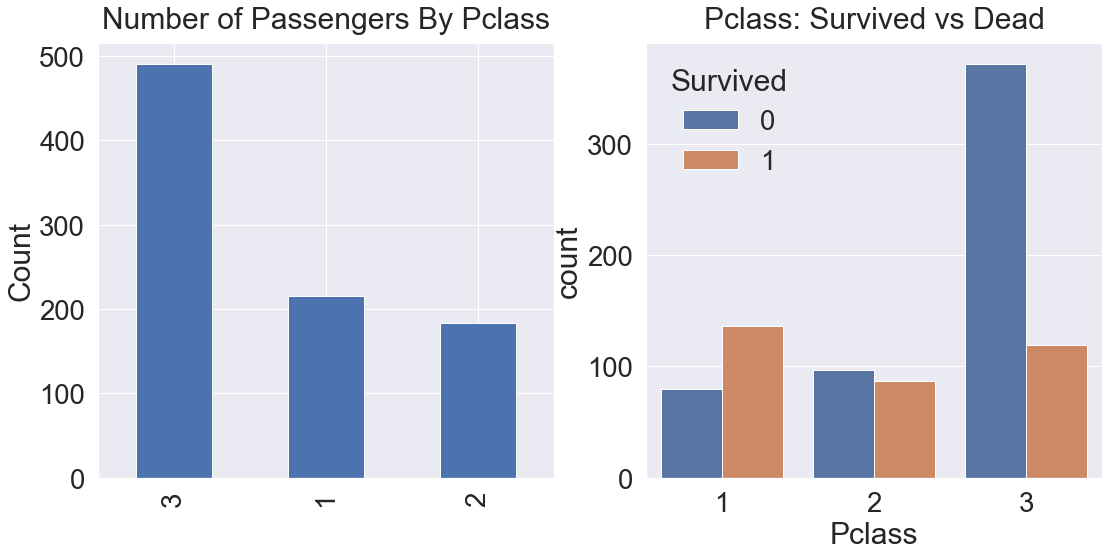

In [35]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize = (18, 8))
df_train['Pclass'].value_counts().plot.bar(ax = ax[0])
ax[0].set_title('Number of Passengers By Pclass', y = y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue = 'Survived', data = df_train, ax = ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

- Pclass가 생존에 큰 영향을 미친다고 생각할 수 있다. 나중에 모델을 세울 때 이 feature을 사용하는 것이 좋다.

## 2.2 Sex

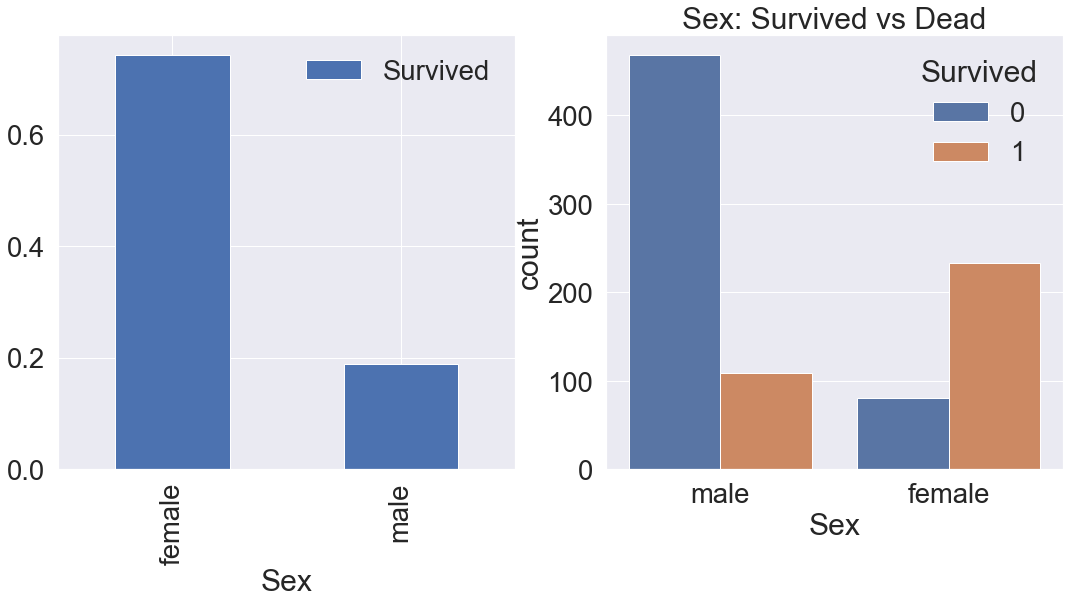

In [36]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index = True).mean().plot.bar(ax = ax[0])
sns.countplot('Sex', hue = 'Survived', data = df_train, ax = ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [39]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [43]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins = True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


## 2.3 Both Sex and Pclass

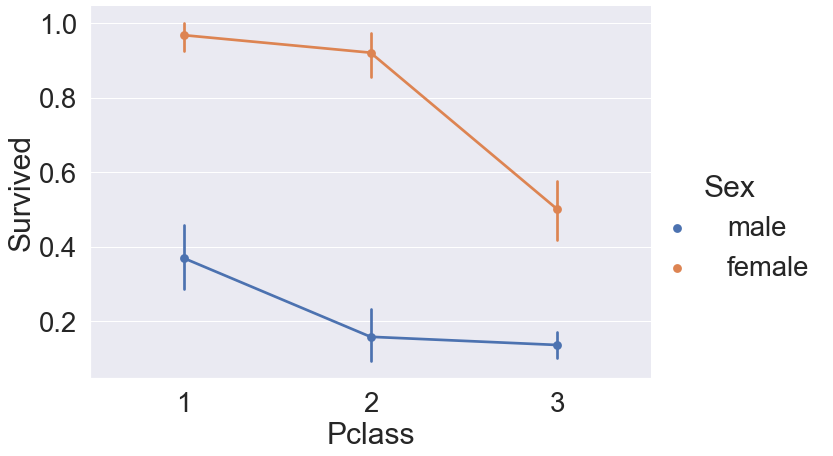

In [44]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', data = df_train, size = 6, aspect = 1.5)

## 2.4 Age

In [47]:
print("제일 나이 많은 탑승객 : {:.1f} Years".format(df_train['Age'].max()))
print("제일 어린 탑승객 : {:.1f} Years".format(df_train['Age'].min()))
print("탑승객 평균 나이 : {:.1f} Years".format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


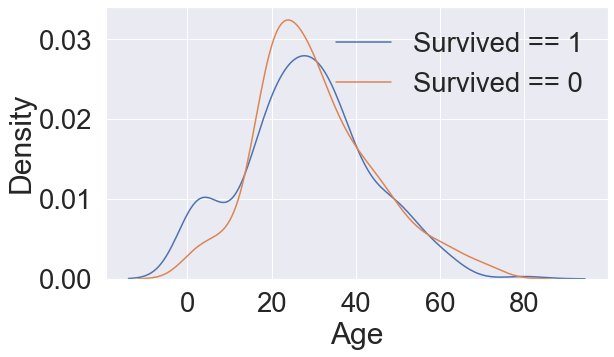

In [48]:
fig, ax = plt.subplots(1, 1, figsize = (9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax = ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax = ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

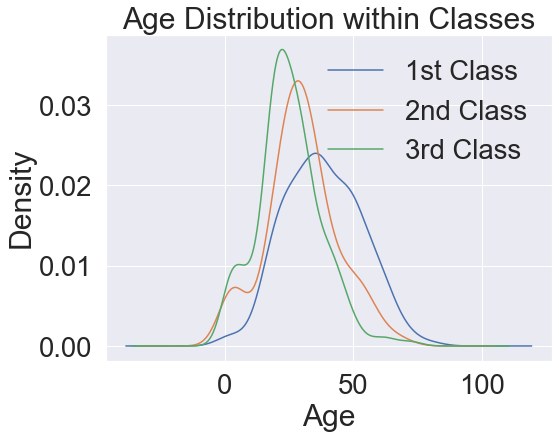

In [49]:
plt.figure(figsize = (8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind = 'kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind = 'kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind = 'kde')

plt.xlabel('Age')
plt.title('Age Distribution within Classes')
plt.legend(["1st Class", "2nd Class", "3rd Class"])
plt.show()

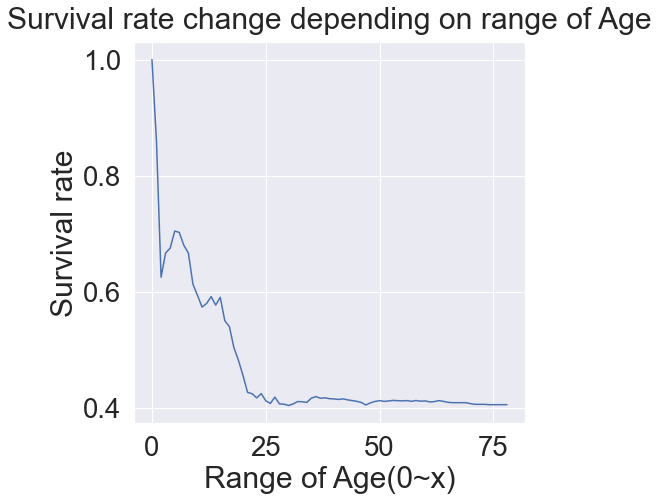

In [50]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize = (7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y = 1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

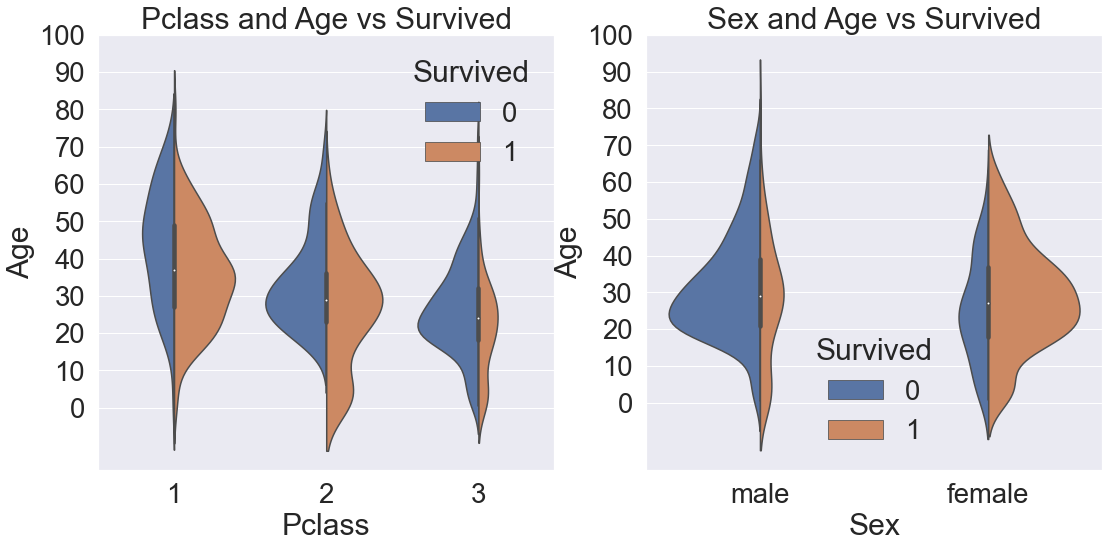

In [51]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.violinplot('Pclass', 'Age', hue = 'Survived', data = df_train, scale = 'count', split = True, ax = ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot('Sex', 'Age', hue = 'Survived', data = df_train, scale = 'count', split = True, ax = ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

## 2.6 Embarked

<AxesSubplot:xlabel='Embarked'>

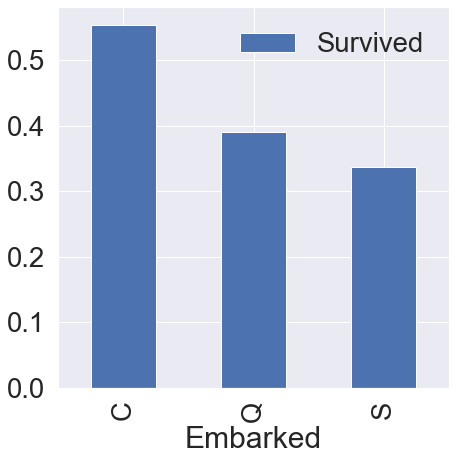

In [52]:
f, ax = plt.subplots(1, 1, figsize = (7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = True).mean().sort_values(by = 'Survived', ascending = False).plot.bar(ax = ax)

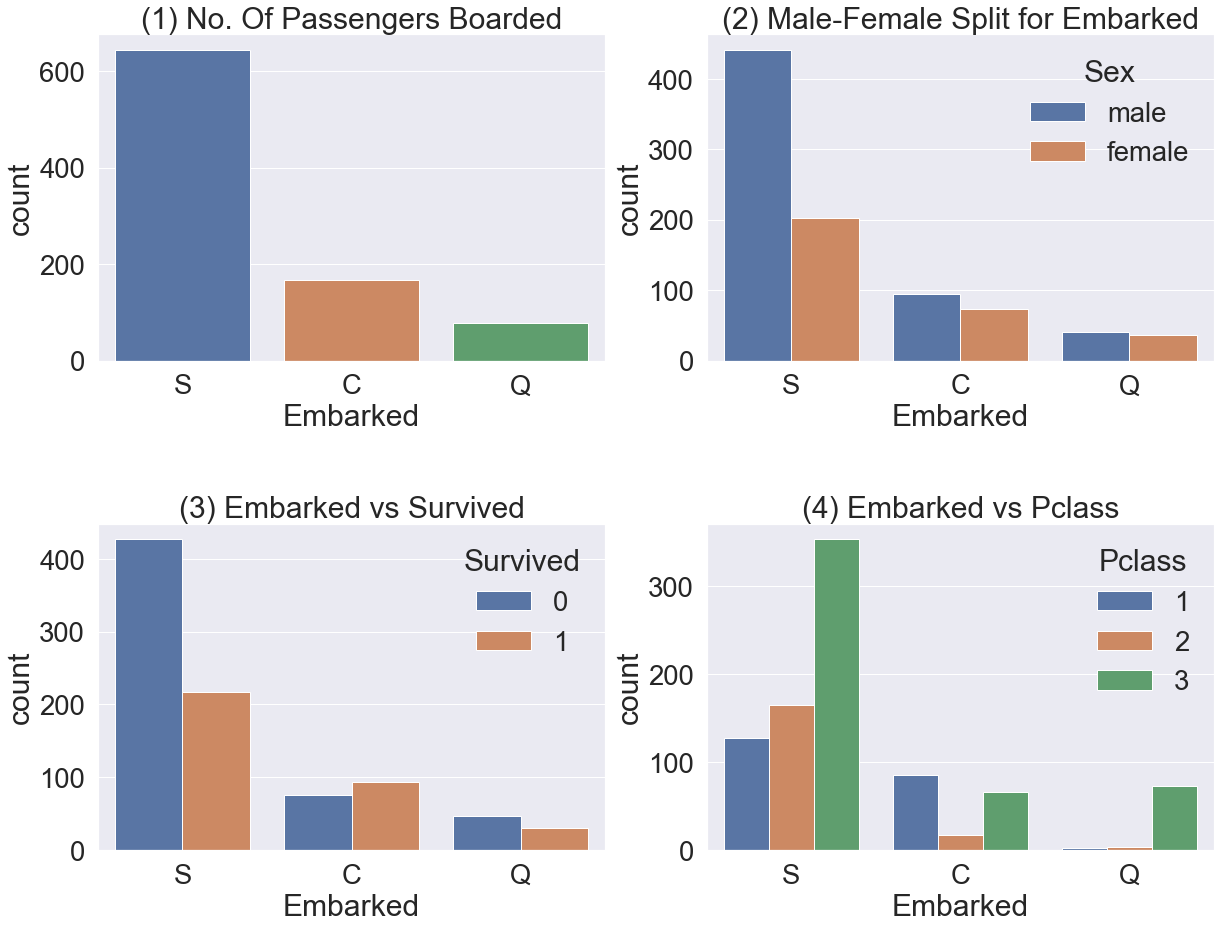

In [53]:
f,ax=plt.subplots(2, 2, figsize=(20,15))
sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## 2.7 Family - SibSp(형제 자매) + Parch(부모, 자녀)

In [54]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 #자신 포함
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 

In [55]:
print("Maximum Size of Family: ", df_train['FamilySize'].max())
print("Minimum Size of Family: ", df_train['FamilySize'].min())

Maximum Size of Family:  11
Minimum Size of Family:  1


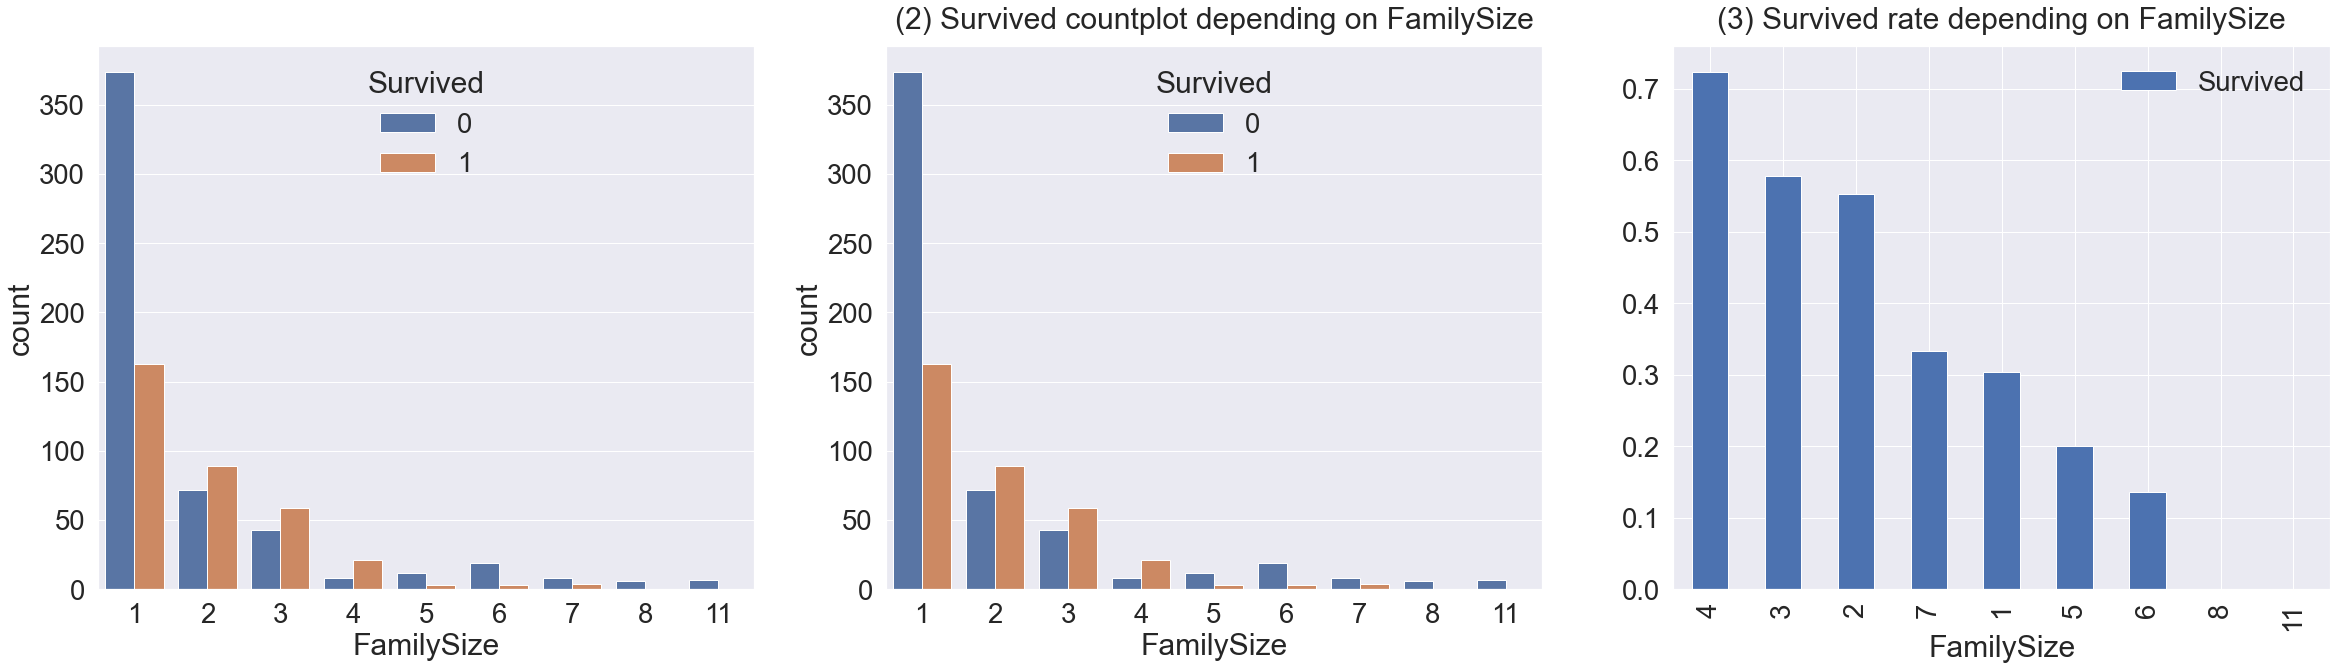

In [59]:
f, ax = plt.subplots(1, 3, figsize = (40, 10))
sns.countplot('FamilySize', hue = 'Survived', data = df_train, ax = ax[0])
ax[1].set_title('(1) No. of Passengers Boarded', y = 1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index = True).mean().sort_values(by = 'Survived', ascending = False).plot.bar(ax = ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y = 1.02)

plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()

- Figure (1): 가족 크기가 1명부터 11명까지 있다. 대부분 1명이고 그 다음으로 2~4명.
- Figure (2), (3) : 가족이 4명인 경우 생존확률이 높다. 가족수가 너무 많거나 적으면 생존 확률이 낮다.

## 2.8 Fare

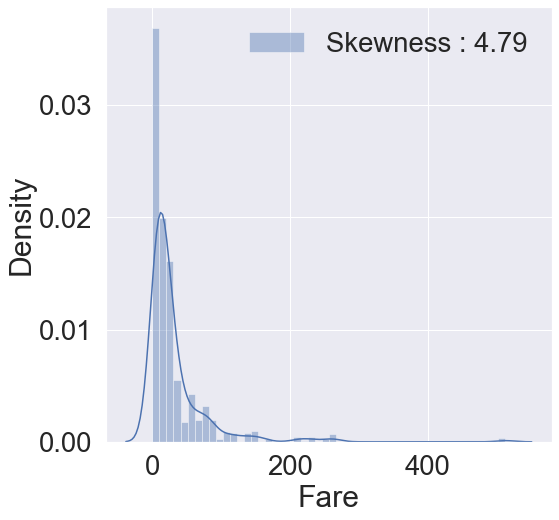

In [62]:
fig, ax = plt.subplots(1, 1, figsize = (8, 8))
g = sns.distplot(df_train['Fare'], color = 'b', label = 'Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax = ax)
g = g.legend(loc = 'best')

- outlier의 영향을 줄이기 위해 Fare에 log를 취한다.
- lambda 함수를 이용해 간단한 로그를 적용하는 함수를 map에 인수로 넣어주면, Fare columns 데이터에 그대로 적용이 된다.

In [64]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

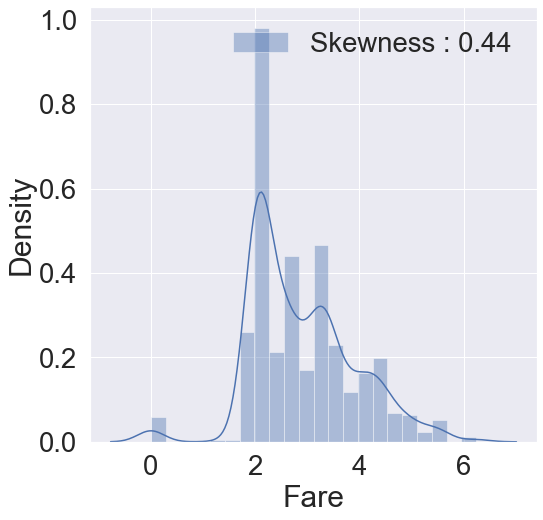

In [65]:
fig, ax = plt.subplots(1, 1, figsize = (8, 8))
g = sns.distplot(df_train['Fare'], color = 'b', label = 'Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax = ax)
g = g.legend(loc = 'best')

- log를 취하니 비대칭성이 많이 사라졌다.
- 모델을 학습시키고 모델의 성능을 높이기 위해 feature들에 조작을 가하거나 feature을 추가하는 것인 feature engineering 에 들어가는 부분이다.

## 2.9 Cabin
- NaN이 80%이므로 정보를 얻어내기 쉽지 않다.

## 2.10 Ticket
- NaN 데이터는 없지만 str이므로 실제 모델에 사용할 때 사실 아이디어가 필요하다.

In [66]:
df_train['Ticket'].value_counts()

CA. 2343            7
1601                7
347082              7
CA 2144             6
347088              6
                   ..
244278              1
4579                1
STON/O2. 3101290    1
250648              1
113807              1
Name: Ticket, Length: 681, dtype: int64

# 필사 2.

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import warnings
plt.style.use('seaborn')
sns.set(font_scale = 2.5)
warnings.filterwarnings('ignore')
%matplotlib inline

In [68]:
df_train = pd.read_csv('./titanic/train.csv')
df_test = pd.read_csv('./titanic/test.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 1.1 Null Data Check

In [72]:
for col in df_train.columns:
    msg = "column: {:>10}\t Percent of Nan Value: {:.2f}%".format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of Nan Value: 0.00%
column:   Survived	 Percent of Nan Value: 0.00%
column:     Pclass	 Percent of Nan Value: 0.00%
column:       Name	 Percent of Nan Value: 0.00%
column:        Sex	 Percent of Nan Value: 0.00%
column:        Age	 Percent of Nan Value: 19.87%
column:      SibSp	 Percent of Nan Value: 0.00%
column:      Parch	 Percent of Nan Value: 0.00%
column:     Ticket	 Percent of Nan Value: 0.00%
column:       Fare	 Percent of Nan Value: 0.00%
column:      Cabin	 Percent of Nan Value: 77.10%
column:   Embarked	 Percent of Nan Value: 0.22%


In [73]:
for col in df_test.columns:
    msg = "column: {:>10}\t Percent of Nan Value: {:.2f}%".format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of Nan Value: 0.00%
column:     Pclass	 Percent of Nan Value: 0.00%
column:       Name	 Percent of Nan Value: 0.00%
column:        Sex	 Percent of Nan Value: 0.00%
column:        Age	 Percent of Nan Value: 20.57%
column:      SibSp	 Percent of Nan Value: 0.00%
column:      Parch	 Percent of Nan Value: 0.00%
column:     Ticket	 Percent of Nan Value: 0.00%
column:       Fare	 Percent of Nan Value: 0.24%
column:      Cabin	 Percent of Nan Value: 78.23%
column:   Embarked	 Percent of Nan Value: 0.00%


<AxesSubplot:>

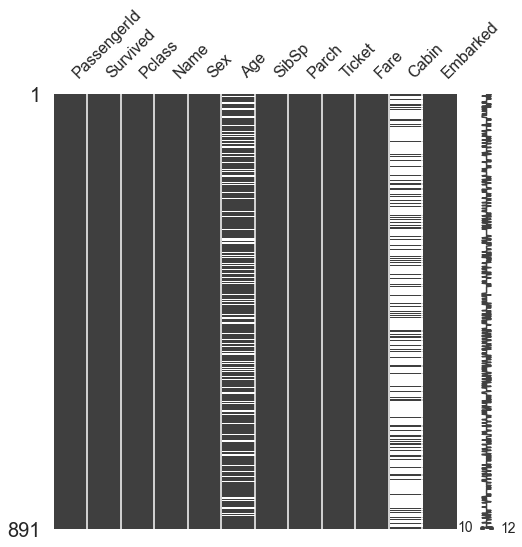

In [74]:
msno.matrix(df = df_train.iloc[:, :], figsize = (8, 8))

<AxesSubplot:>

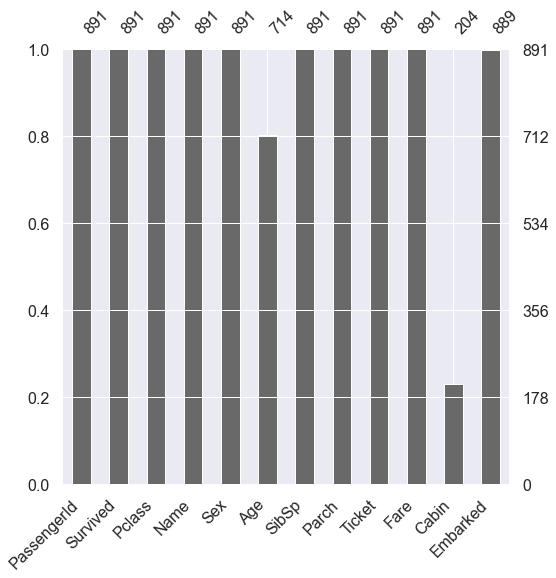

In [75]:
msno.bar(df = df_train.iloc[:, :], figsize = (8, 8))

<AxesSubplot:>

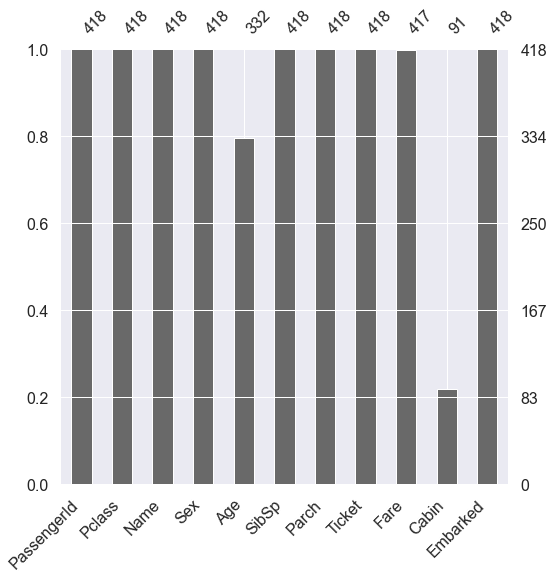

In [77]:
msno.bar(df = df_test.iloc[:, :], figsize = (8, 8))

## 1.2 Target Label 확인

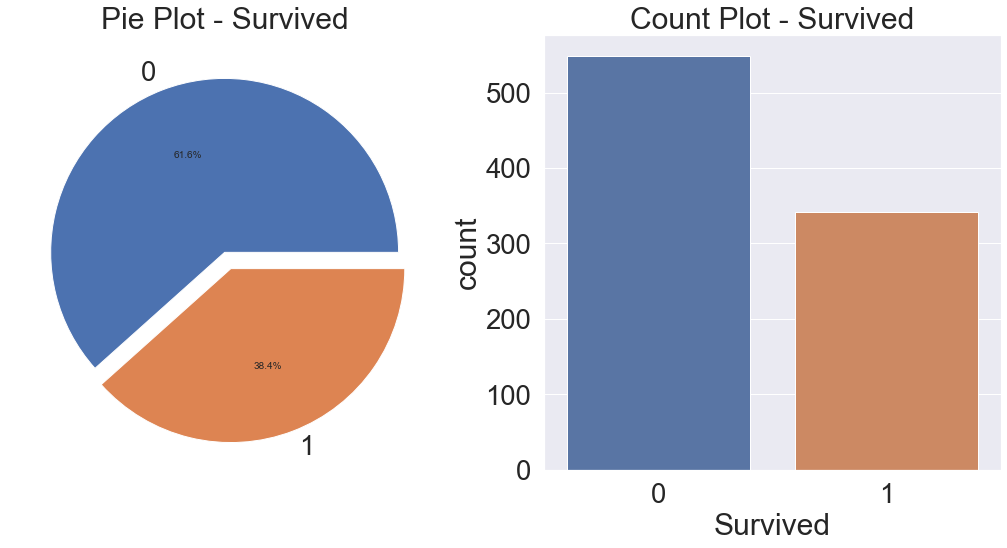

In [78]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))

df_train['Survived'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%', ax = ax[0])
ax[0].set_title('Pie Plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data = df_train, ax = ax[1])
ax[1].set_title('Count Plot - Survived')

plt.show()

## 2.1 Pclass

In [80]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [81]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [84]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins = True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<AxesSubplot:xlabel='Pclass'>

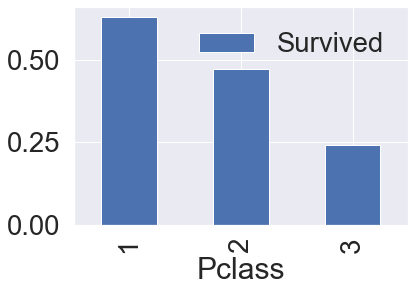

In [85]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).mean().sort_values(by = 'Survived', ascending = False).plot.bar()

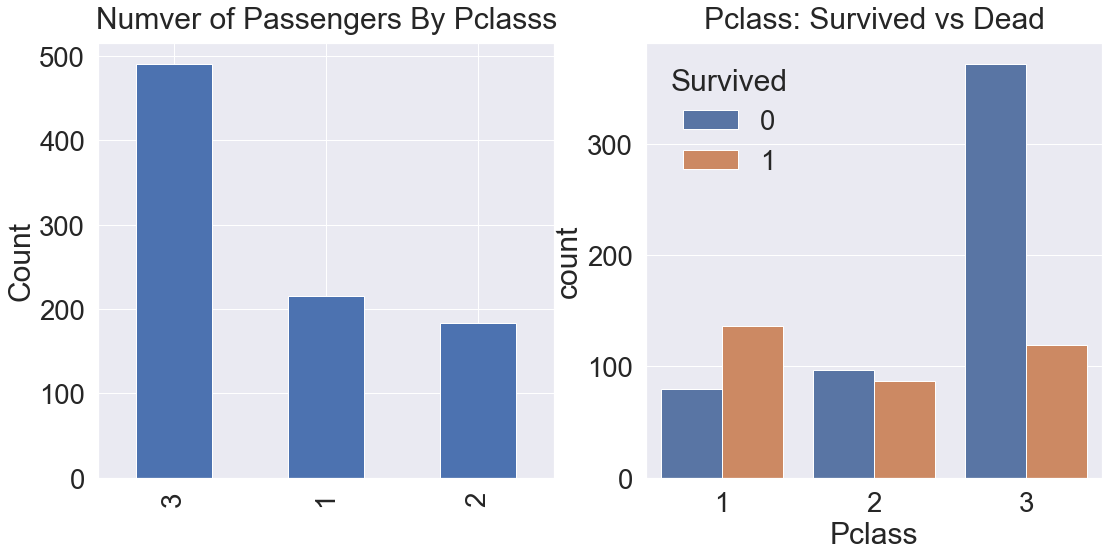

In [87]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize = (18, 8))
df_train['Pclass'].value_counts().plot.bar(ax = ax[0])
ax[0].set_title("Numver of Passengers By Pclasss", y = y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue = 'Survived', data = df_train, ax = ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y = y_position)
plt.show()

## 2.2 Sex

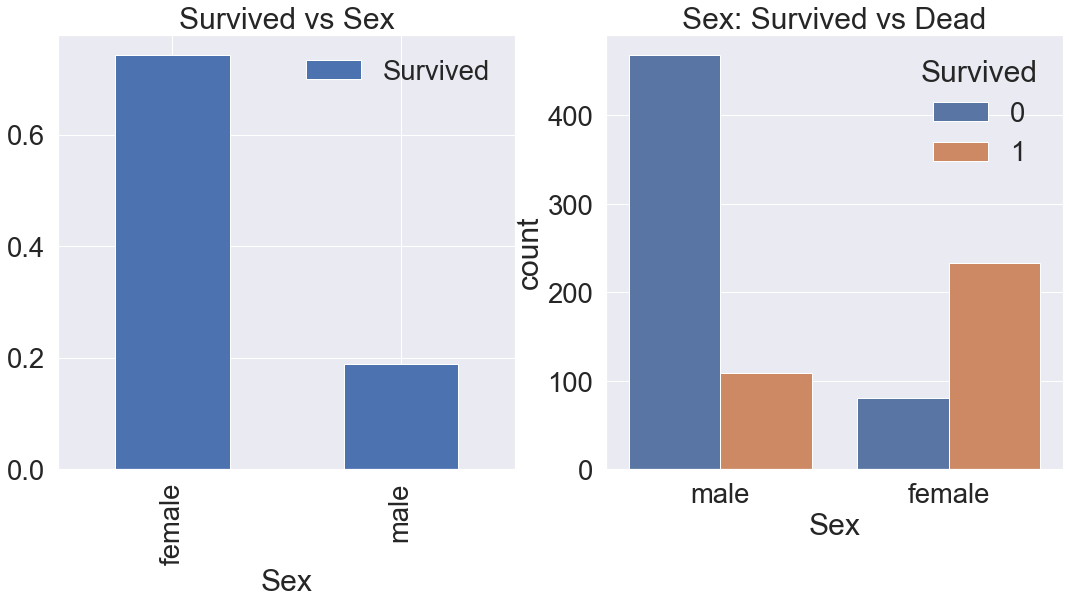

In [89]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index = True).mean().plot.bar(ax = ax[0])
ax[0].set_title("Survived vs Sex")
sns.countplot("Sex", hue = "Survived", data = df_train, ax =ax[1])
ax[1].set_title("Sex: Survived vs Dead")
plt.show()

In [90]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [91]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins = True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


## 2.3 Both Sex and Pclass

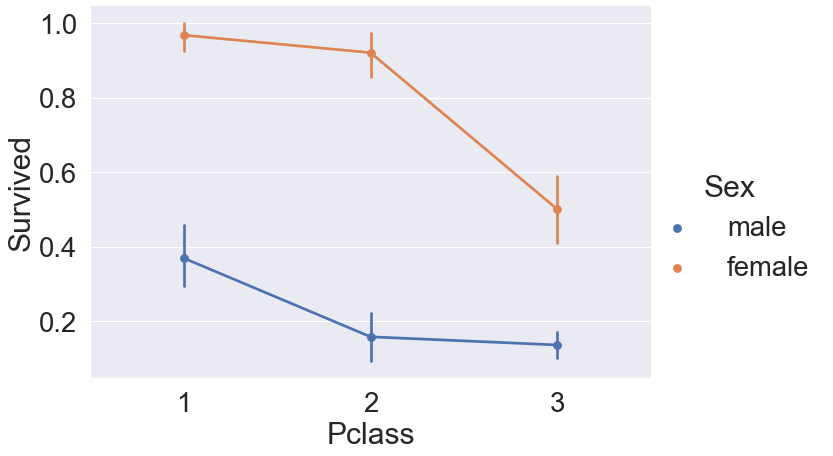

In [92]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', data = df_train, size = 6, aspect = 1.5)

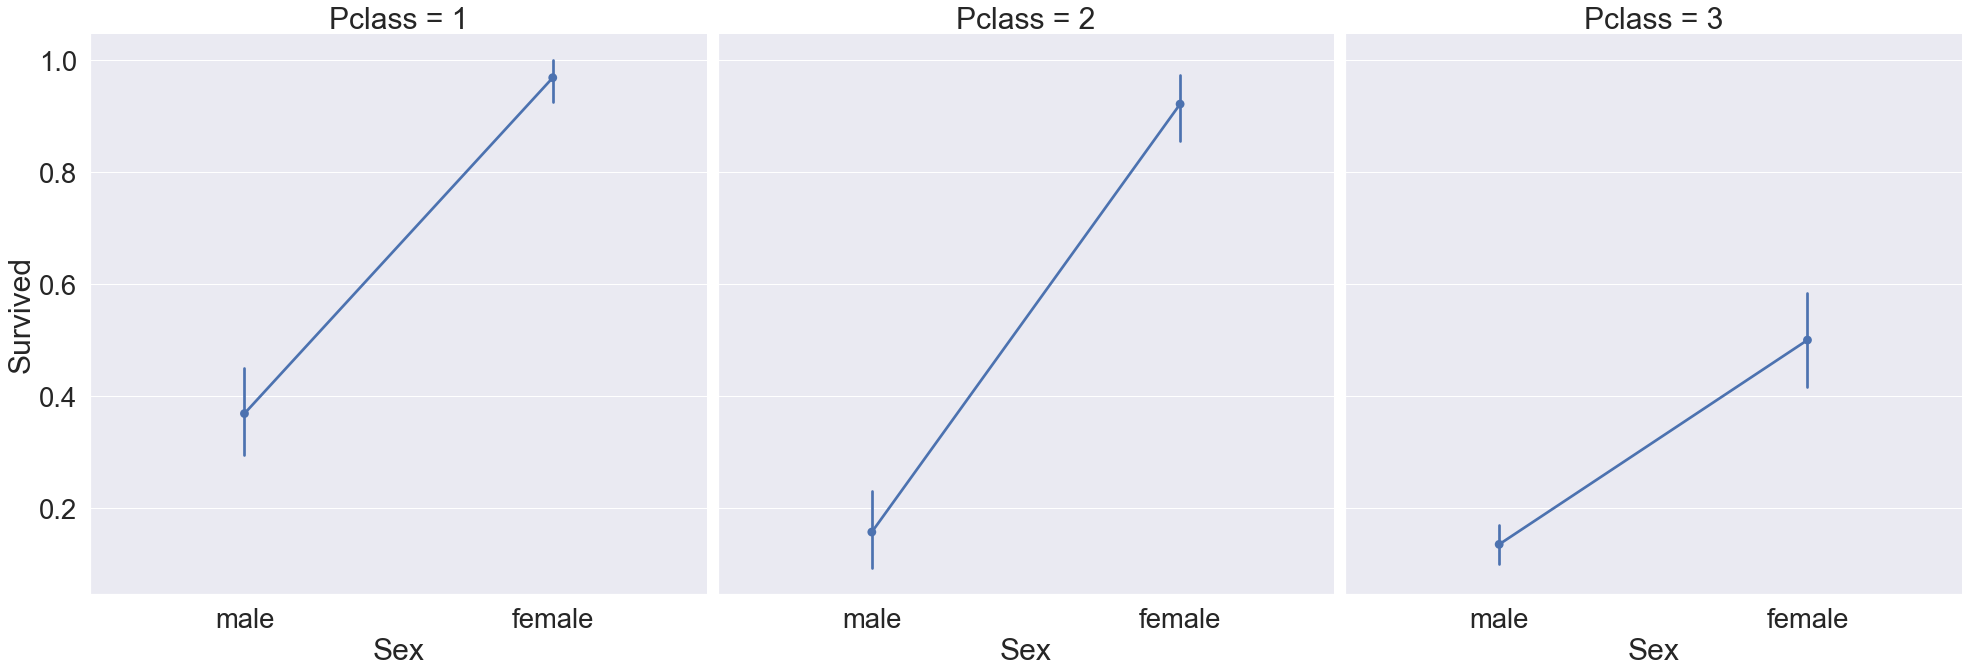

In [93]:
sns.factorplot(x = 'Sex', y = 'Survived', col = 'Pclass', data = df_train, satureation = 0.5, size = 9, aspect = 1)

## 2.4 Age

In [94]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print("제일 어린 탑승객 : {:.1f} Years".format(df_train['Age'].min()))
print("탑승객 평균 나이 : {:.1f} Years".format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


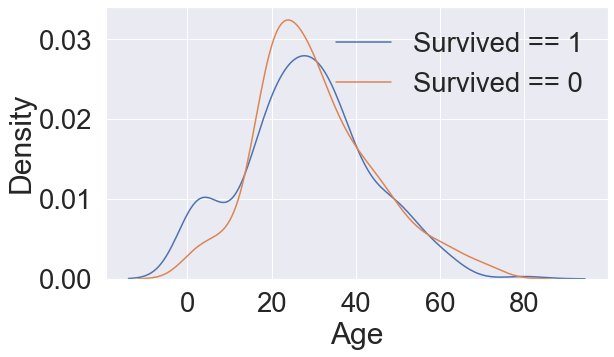

In [95]:
fig, ax = plt.subplots(1, 1, figsize = (9,5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax = ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax = ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

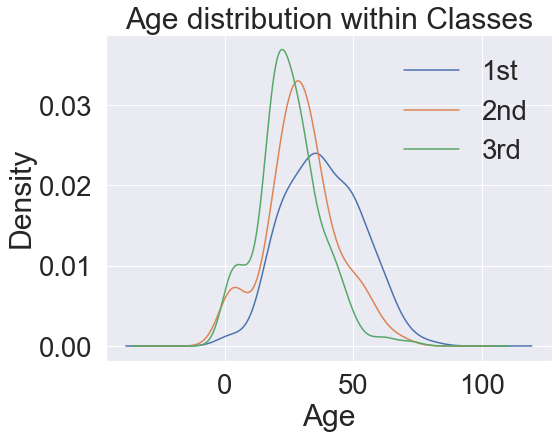

In [96]:
plt.figure(figsize = (8,6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind = 'kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind = 'kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind = 'kde')

plt.xlabel('Age')
plt.title('Age distribution within Classes')
plt.legend(['1st', '2nd', '3rd'])

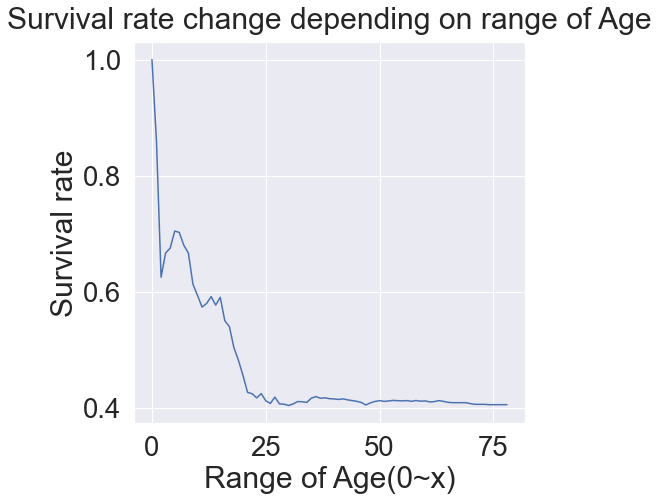

In [97]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

## 2.5 Pclass, Sex, age

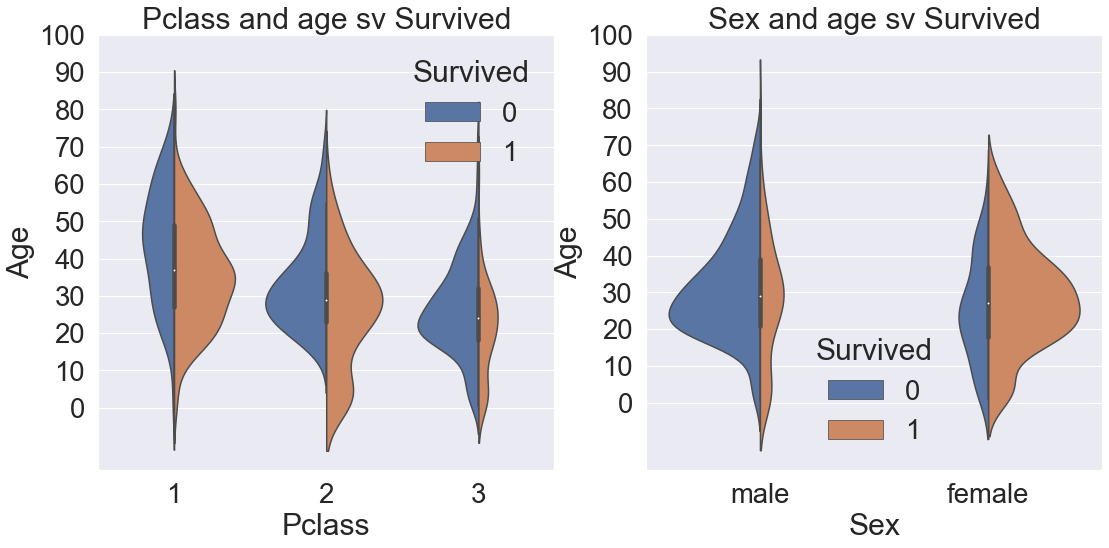

In [100]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))

sns.violinplot('Pclass', 'Age', hue = 'Survived', data = df_train, scale = 'count', split = True, ax = ax[0])
ax[0].set_title('Pclass and age sv Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot('Sex', 'Age', hue = 'Survived', data = df_train, scale = 'count', split = True, ax = ax[1])
ax[1].set_title('Sex and age sv Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

# 2.6 Embarked

<AxesSubplot:xlabel='Embarked'>

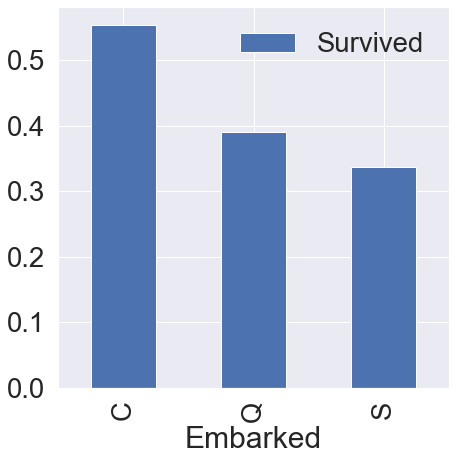

In [103]:
f, ax = plt.subplots(1, 1, figsize = (7,7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = True).mean().sort_values(by = 'Survived', ascending = False).plot.bar(ax = ax)

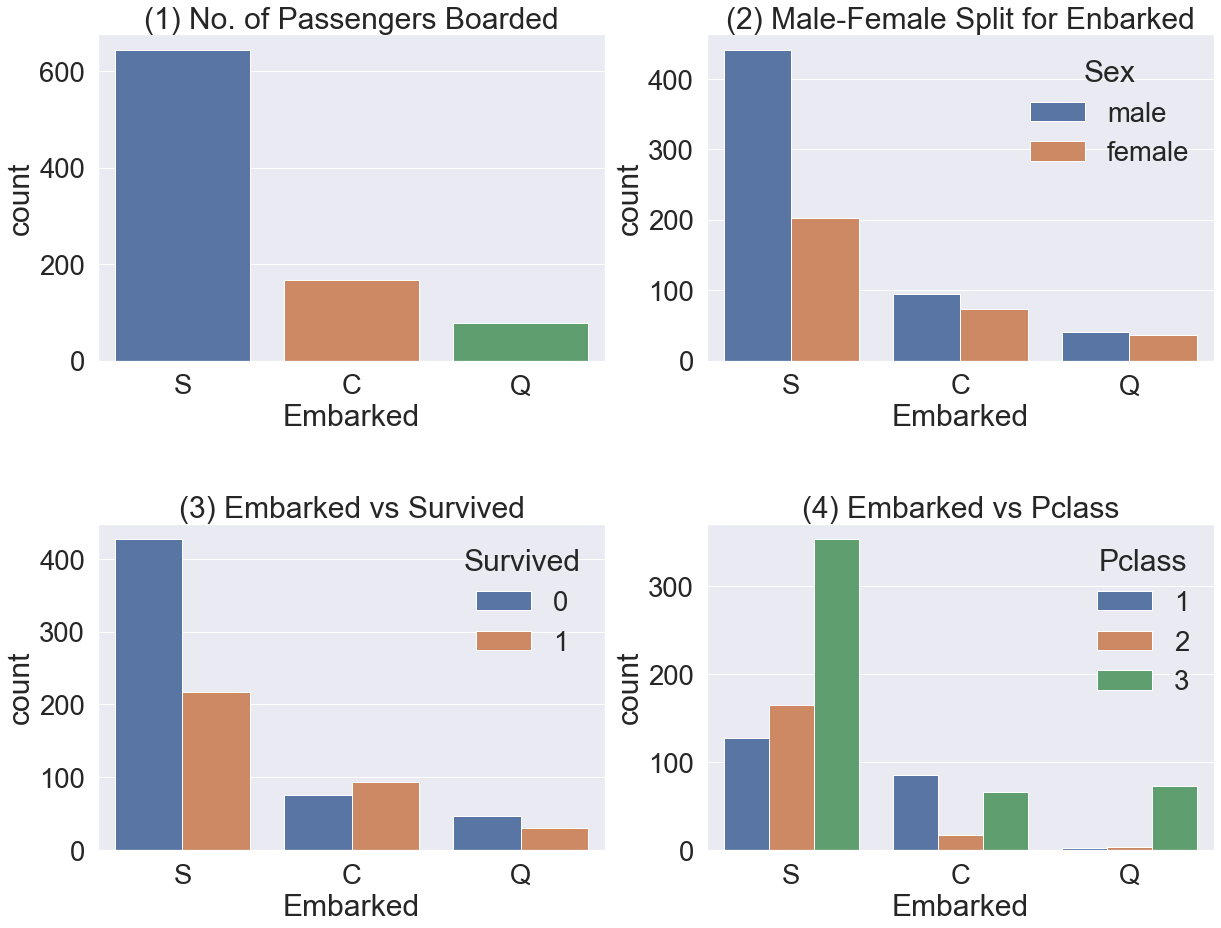

In [107]:
f, ax = plt.subplots(2, 2, figsize = (20, 15))

sns.countplot('Embarked', data = df_train, ax = ax[0, 0])
ax[0, 0].set_title('(1) No. of Passengers Boarded')

sns.countplot('Embarked', hue = 'Sex', data = df_train, ax = ax[0, 1])
ax[0, 1].set_title('(2) Male-Female Split for Enbarked')

sns.countplot('Embarked', hue = 'Survived', data = df_train, ax = ax[1, 0])
ax[1, 0].set_title('(3) Embarked vs Survived')

sns.countplot('Embarked', hue = 'Pclass', data = df_train, ax = ax[1, 1])
ax[1, 1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()

## 2.7 Family - SibSp + parch

In [108]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1

In [109]:
print("Maximum Size of Family : ", df_train['FamilySize'].max())
print("Minimum Size of Family : ", df_train['FamilySize'].min())

Maximum Size of Family :  11
Minimum Size of Family :  1


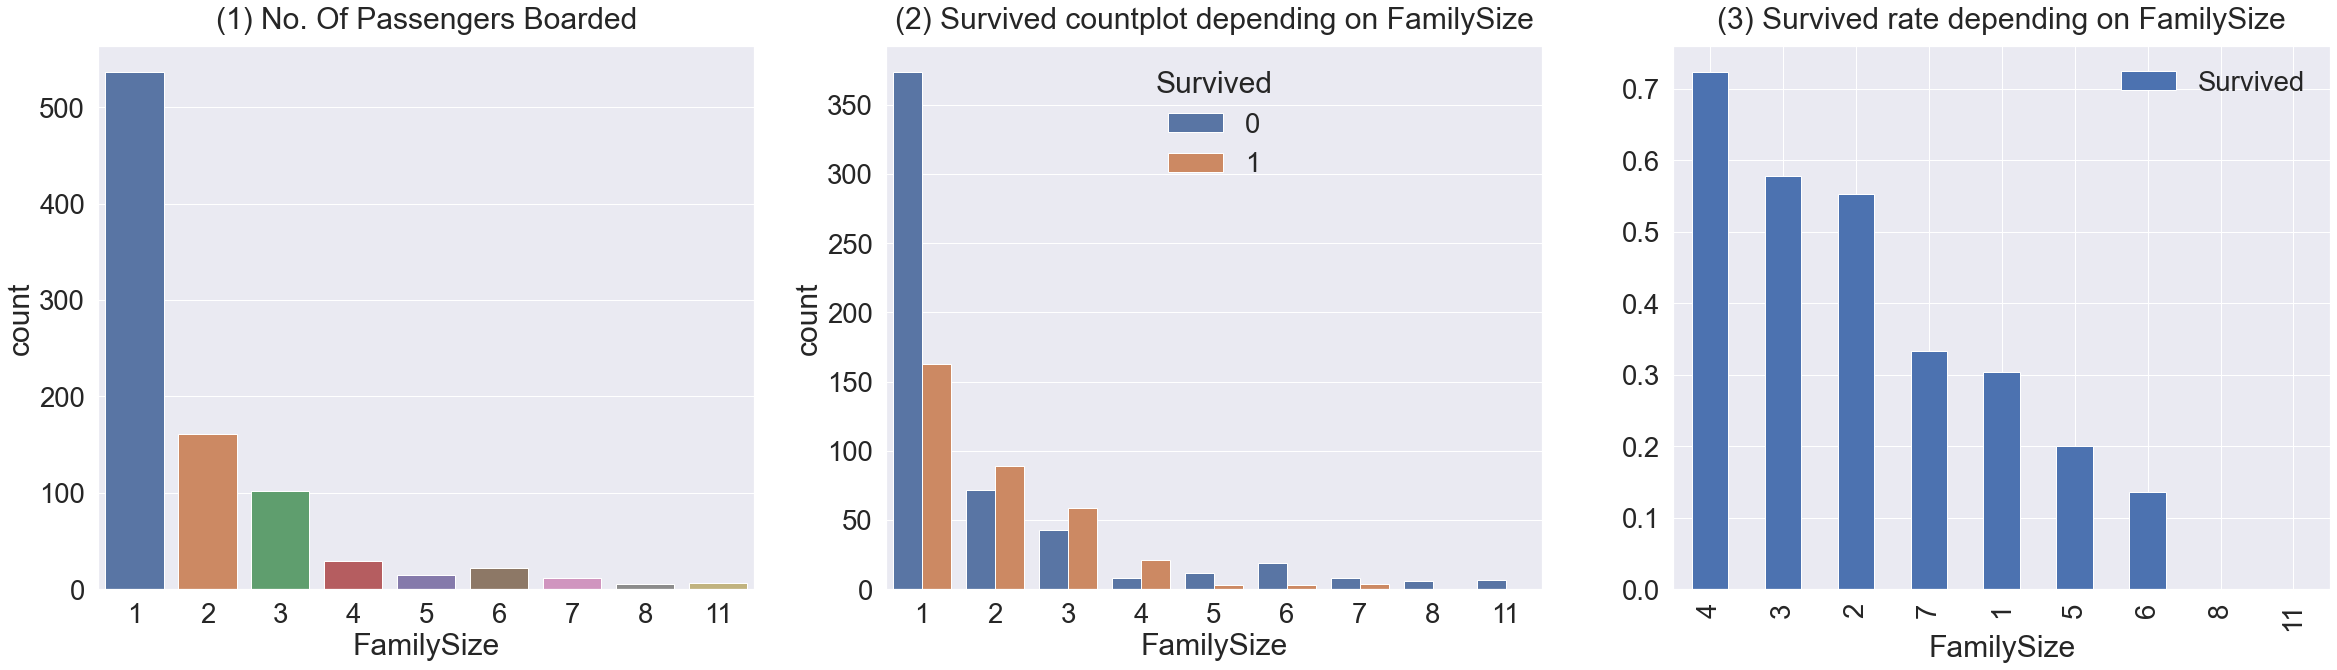

In [111]:
f,ax=plt.subplots(1, 3, figsize=(40,10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## 2.8 Fare

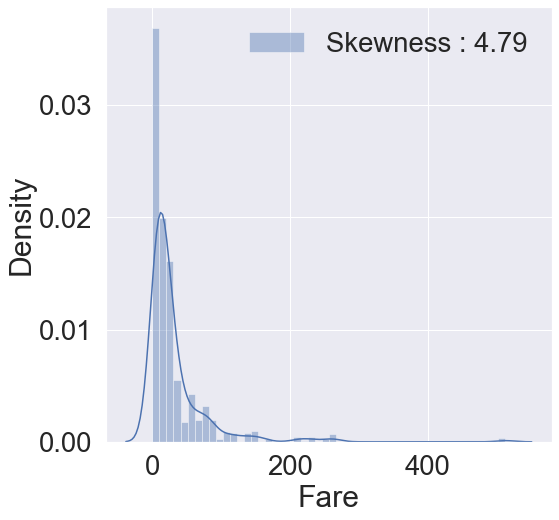

In [112]:
fig, ax = plt.subplots(1, 1, figsize = (8, 8))
g = sns.distplot(df_train['Fare'], label = 'Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax = ax)
g = g.legend(loc = 'best')

In [113]:
df_test.loc[df_test.Fare.isnull(), "Fare"] = df_test["Fare"].mean()
df_train["Fare"] - df_train["Fare"].map(lambda i : np.log(i) if i > 0 else 0)
df_test["Fare"] - df_test["Fare"].map(lambda i : np.log(i) if i > 0 else 0)

0        5.771340
1        5.054090
2        7.416664
3        6.503497
4        9.778918
          ...    
413      5.964328
414    104.209570
415      5.268999
416      5.964328
417     19.251102
Name: Fare, Length: 418, dtype: float64

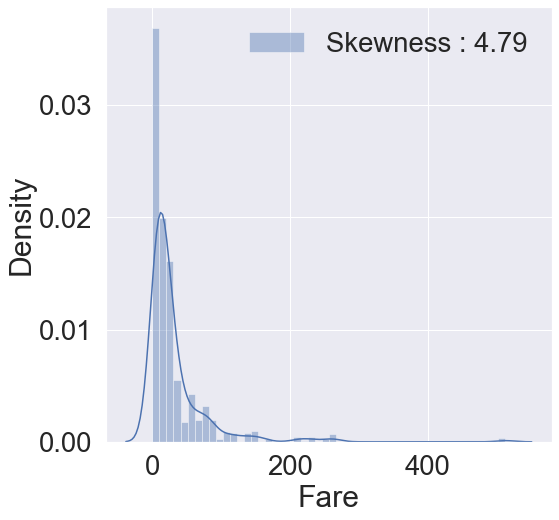

In [114]:
fig, ax = plt.subplots(1, 1, figsize = (8, 8))
g = sns.distplot(df_train["Fare"], label = "Skewness : {:.2f}".format(df_train["Fare"].skew()), ax = ax)
g = g.legend(loc = "best")

## 2.9 Cabin

## 2.10 Ticket

In [115]:
df_train["Ticket"].value_counts()

CA. 2343            7
1601                7
347082              7
CA 2144             6
347088              6
                   ..
244278              1
4579                1
STON/O2. 3101290    1
250648              1
113807              1
Name: Ticket, Length: 681, dtype: int64

# 필사 3.

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings

plt.style.use('seaborn')
sns.set(font_scale = 2.5)
warnings.filterwarnings("ignore")
%matplotlib inline

## 1. Dataset 확인

In [118]:
df_train = pd.read_csv('./titanic/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [119]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 1.1 Null Data Check

In [121]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN Value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN Value: 0.00%
column:   Survived	 Percent of NaN Value: 0.00%
column:     Pclass	 Percent of NaN Value: 0.00%
column:       Name	 Percent of NaN Value: 0.00%
column:        Sex	 Percent of NaN Value: 0.00%
column:        Age	 Percent of NaN Value: 19.87%
column:      SibSp	 Percent of NaN Value: 0.00%
column:      Parch	 Percent of NaN Value: 0.00%
column:     Ticket	 Percent of NaN Value: 0.00%
column:       Fare	 Percent of NaN Value: 0.00%
column:      Cabin	 Percent of NaN Value: 77.10%
column:   Embarked	 Percent of NaN Value: 0.22%


<AxesSubplot:>

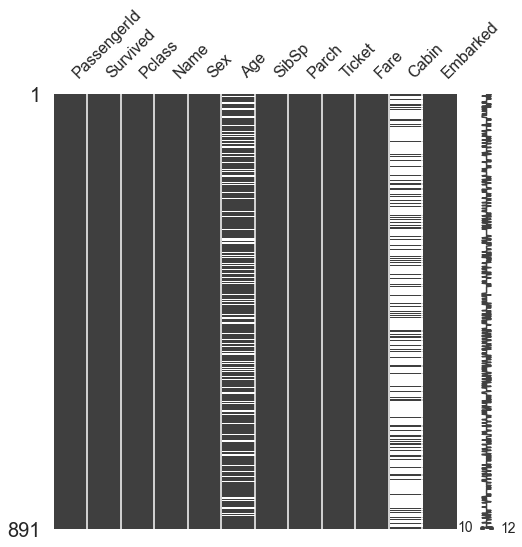

In [122]:
msno.matrix(df = df_train.iloc[:, :], figsize = (8, 8))

<AxesSubplot:>

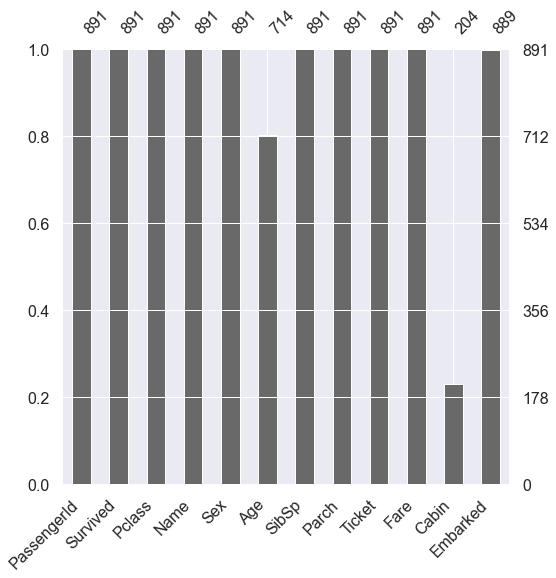

In [123]:
msno.bar(df = df_train.iloc[:, :], figsize = (8, 8))

## 1.2 Target Label 확인

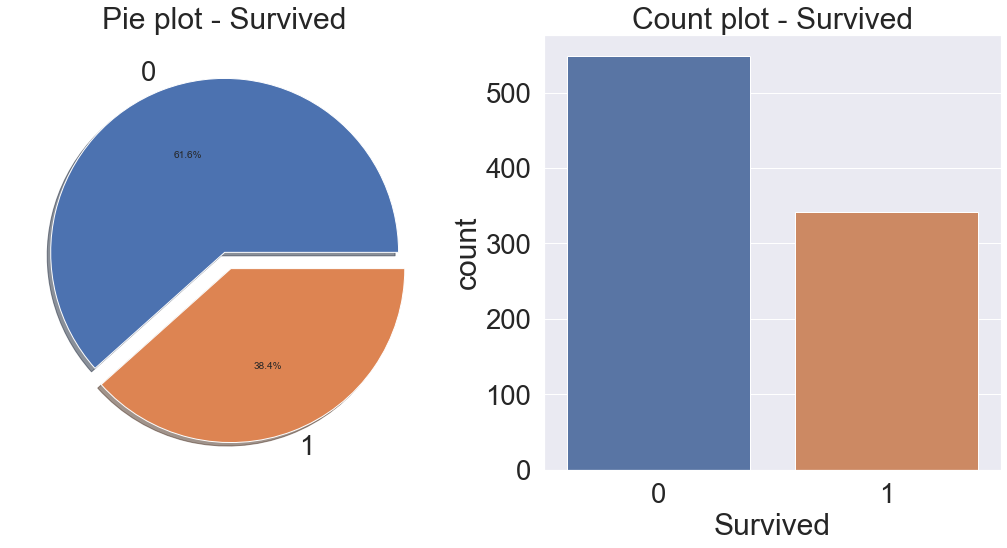

In [124]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))

df_train['Survived'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%', ax = ax[0], shadow = True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data = df_train, ax = ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

## 2.1 Pclass

In [125]:
df_train[["Pclass", "Survived"]].groupby(["Pclass"], as_index = True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [126]:
df_train[["Pclass", "Survived"]].groupby(["Pclass"], as_index = True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [128]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins = True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<AxesSubplot:xlabel='Pclass'>

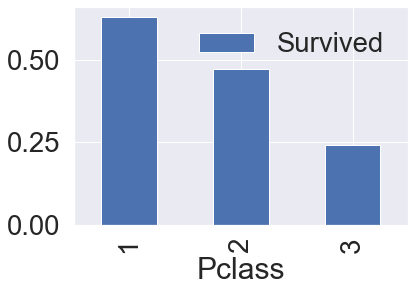

In [129]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).mean().sort_values(by = 'Survived', ascending = False).plot.bar()

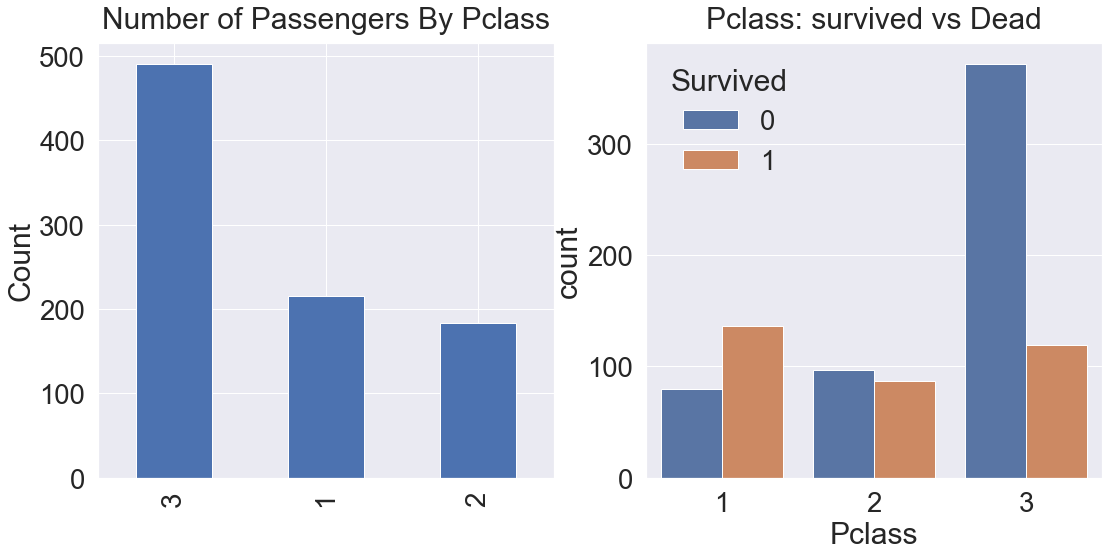

In [131]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize = (18, 8))
df_train["Pclass"].value_counts().plot.bar(ax = ax[0])
ax[0].set_title("Number of Passengers By Pclass", y = y_position)
ax[0].set_ylabel("Count")
sns.countplot('Pclass', hue = "Survived", data = df_train, ax = ax[1])
ax[1].set_title("Pclass: survived vs Dead", y = y_position)
plt.show()

## 2.2 Sex

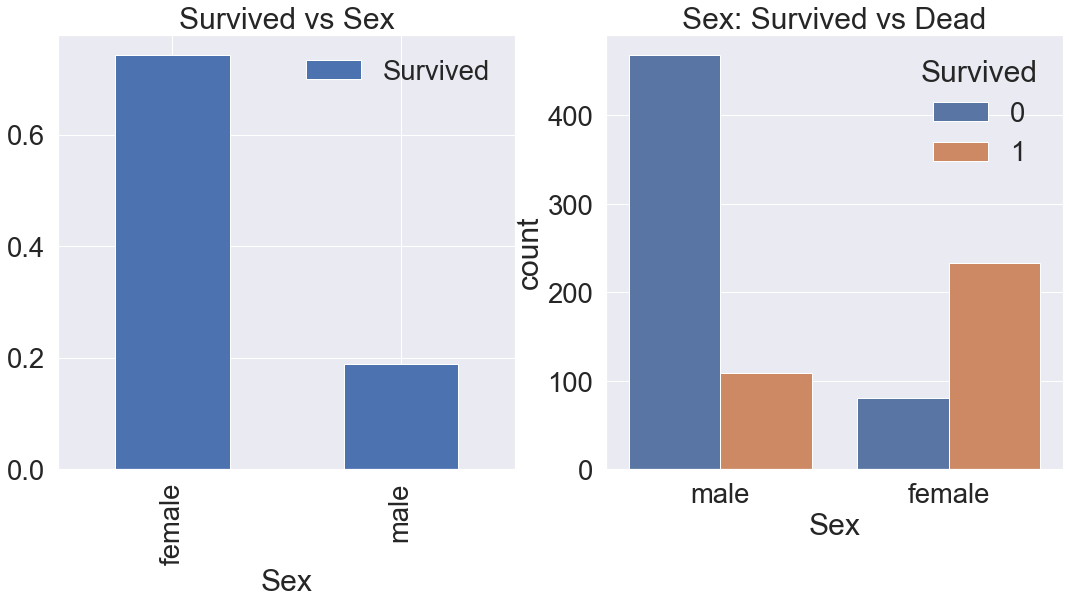

In [134]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index = True).mean().plot.bar(ax = ax[0])
ax[0].set_title("Survived vs Sex")
sns.countplot('Sex', hue = 'Survived', data = df_train, ax = ax[1])
ax[1].set_title("Sex: Survived vs Dead")
plt.show()

In [138]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [139]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins = True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


## 2.3 Both Sex and Pclass

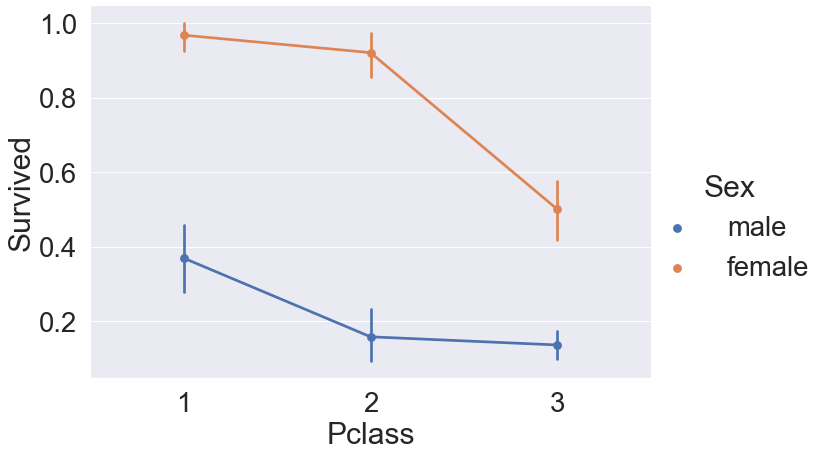

In [141]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', data = df_train, size = 6, aspect = 1.5)

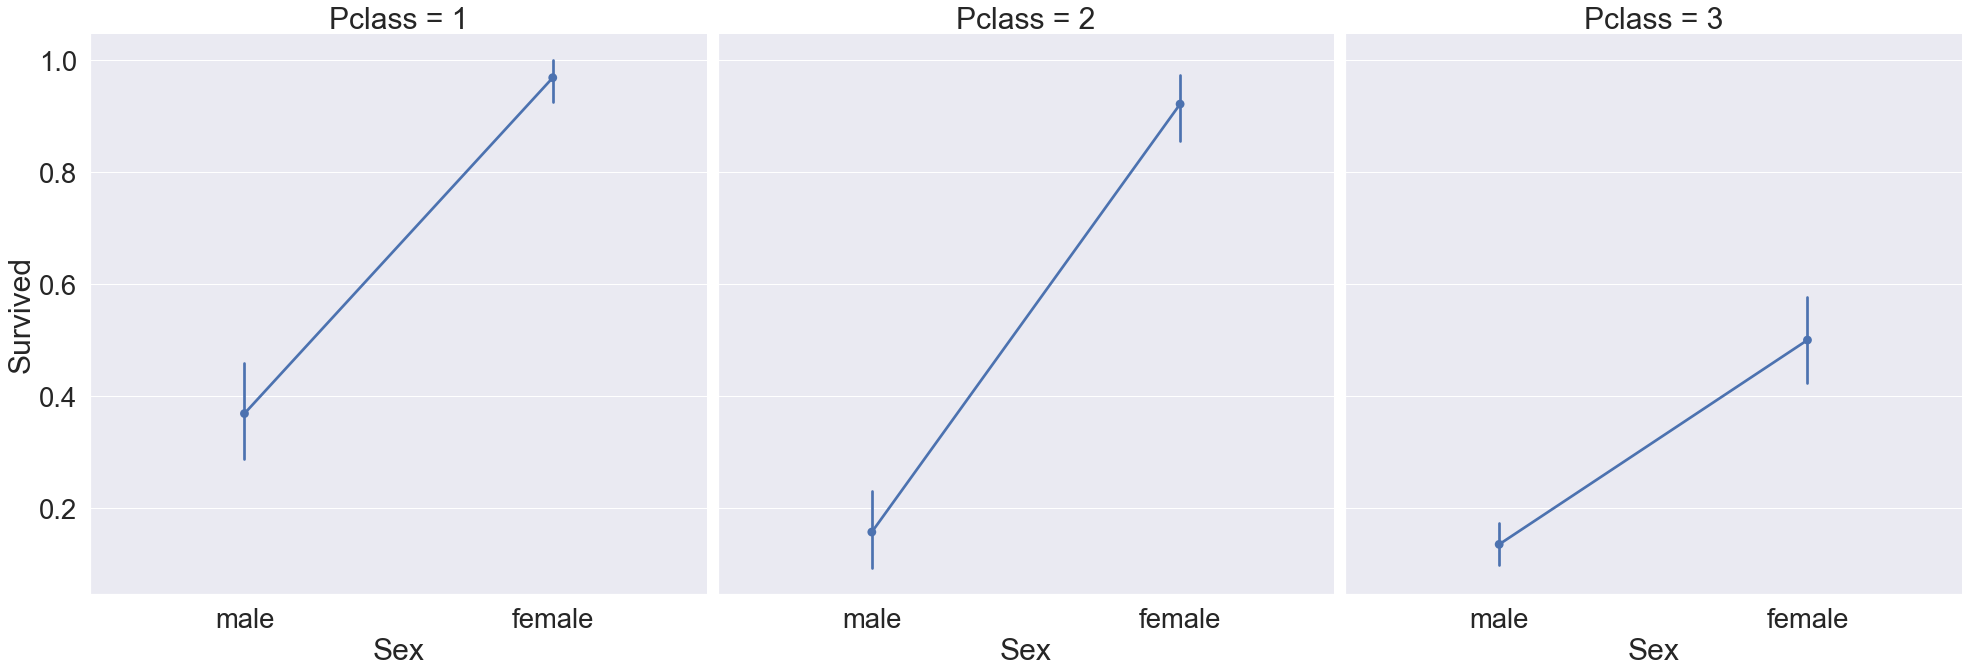

In [142]:
sns.factorplot(x = 'Sex', y = 'Survived', col = 'Pclass', data = df_train, satureation = 0.5, size = 9, aspect = 1)

## 2.4 Age

In [145]:
print("제일 나이 많은 탑승객 : {:.1f} Years".format(df_train['Age'].max()))
print("제일 어린 탑승객 : {:.1f} Years".format(df_train['Age'].min()))
print("탑승객 평균 나이 : {:.1f} Years".format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


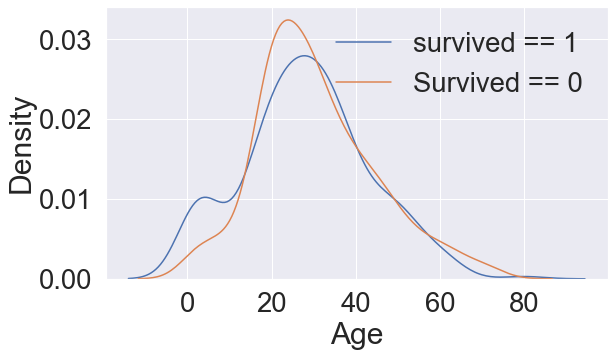

In [146]:
fig, ax = plt.subplots(1, 1, figsize = (9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax = ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax = ax)
plt.legend(["survived == 1", "Survived == 0"])
plt.show()

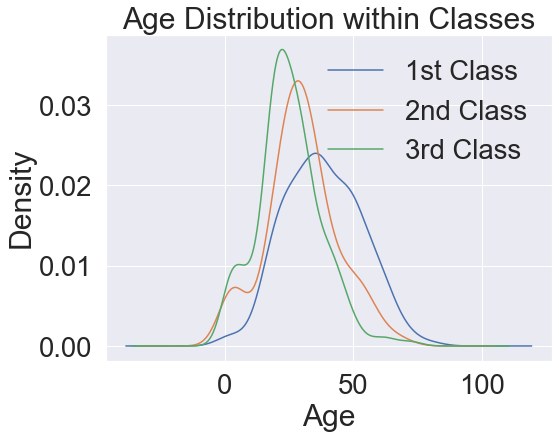

In [148]:
plt.figure(figsize = (8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind = 'kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind = 'kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind = 'kde')

plt.xlabel('Age')
plt.title("Age Distribution within Classes")
plt.legend(["1st Class", "2nd Class", "3rd Class"])

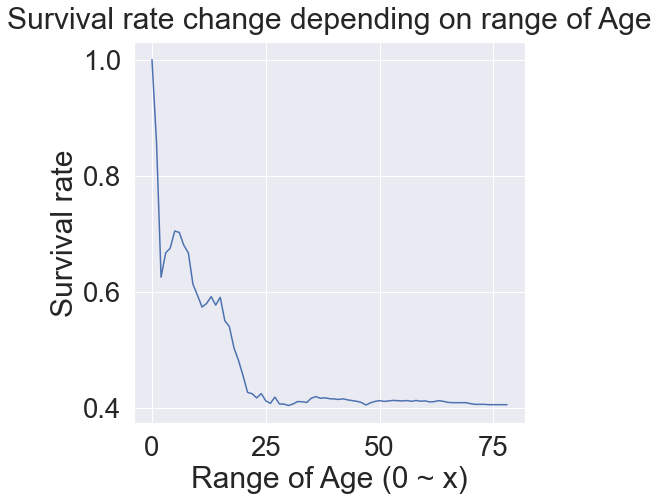

In [151]:
cummulate_survival_ratio =[]
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize = (7, 7))
plt.plot(cummulate_survival_ratio)
plt.title("Survival rate change depending on range of Age", y = 1.02)
plt.ylabel("Survival rate")
plt.xlabel("Range of Age (0 ~ x)")
plt.show()

## 2.5 Pclass, Sex, Age

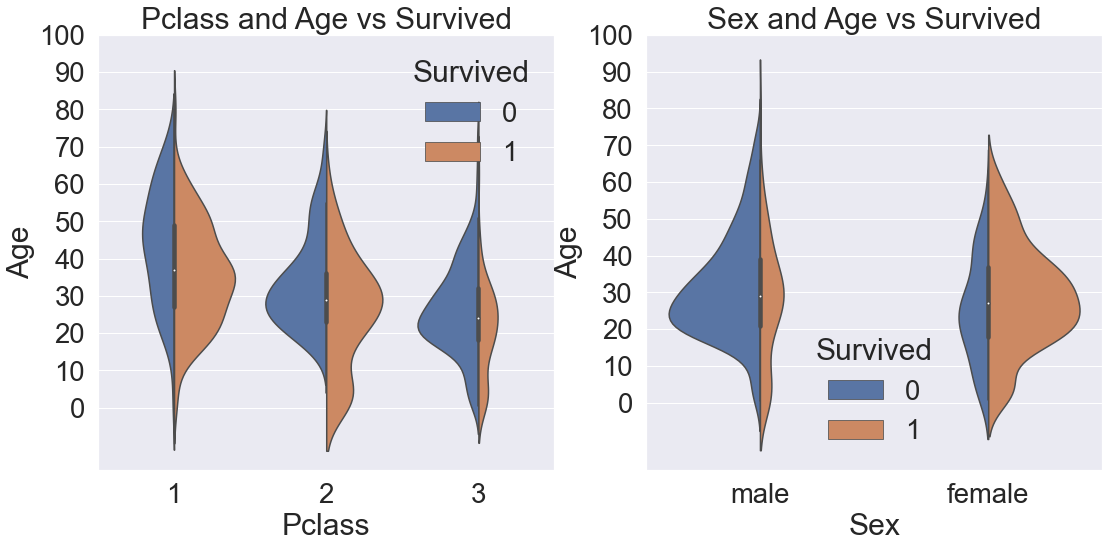

In [153]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.violinplot('Pclass', 'Age', hue = 'Survived', data = df_train, scale = 'count', split = True, ax = ax[0])
ax[0].set_title("Pclass and Age vs Survived")
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot('Sex', 'Age', hue = 'Survived', data = df_train, scale = 'count', split = True, ax = ax[1])
ax[1].set_title("Sex and Age vs Survived")
ax[1].set_yticks(range(0, 110, 10))
plt.show()

## 2.6 Embarked

<AxesSubplot:xlabel='Embarked'>

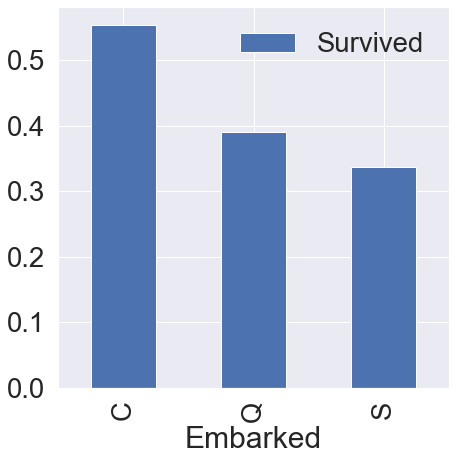

In [155]:
f, ax = plt.subplots(1, 1, figsize = (7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = True).mean().sort_values(by = 'Survived', ascending = False).plot.bar(ax = ax)

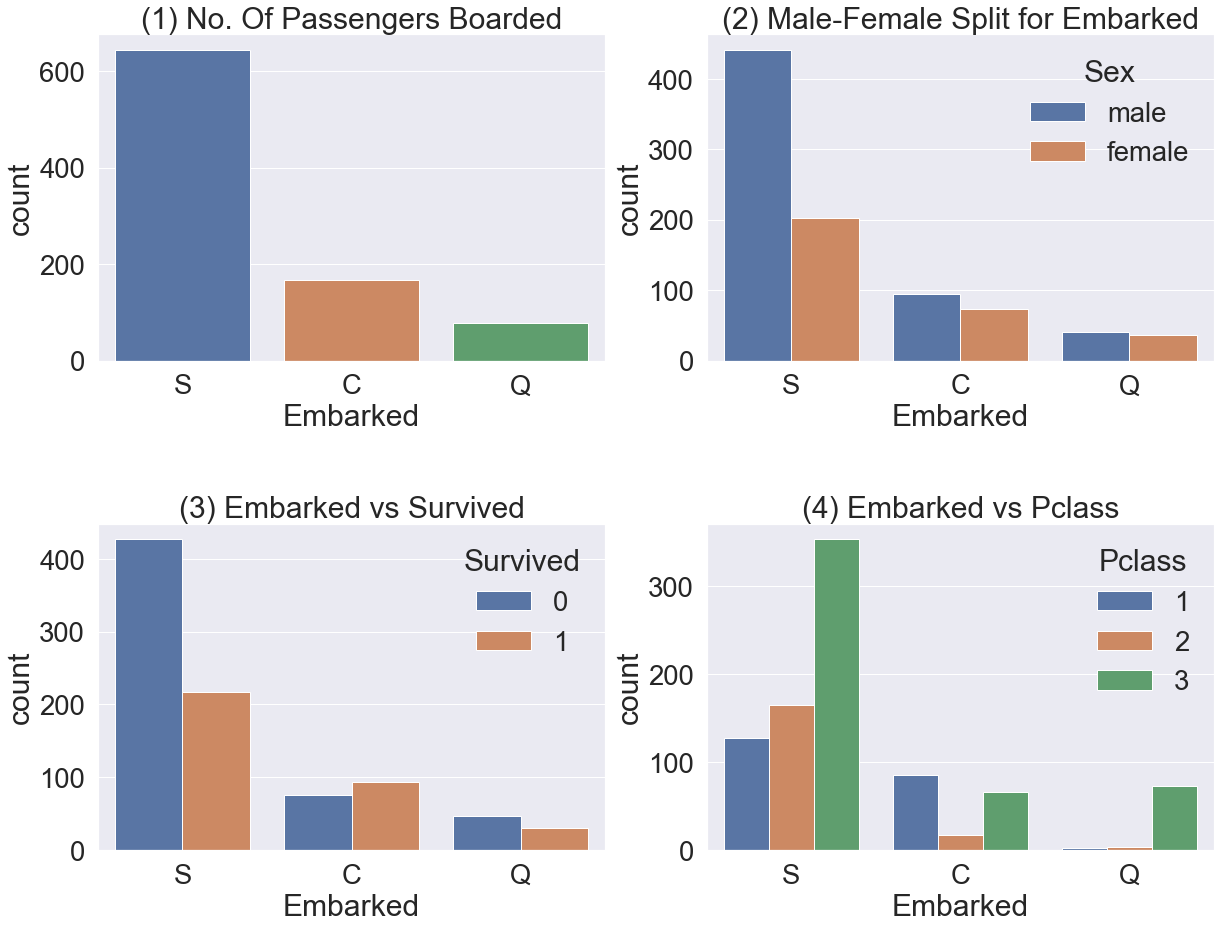

In [156]:
f,ax=plt.subplots(2, 2, figsize=(20,15))
sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## 2.7 Family - SibSp + Parch

In [158]:
df_train['Family'] = df_train['SibSp'] + df_train['Parch'] + 1
print("Maximum Size of Family : ", df_train['Family'].max())
print("Minimum Size of Family : ", df_train['Family'].min())

Maximum Size of Family :  11
Minimum Size of Family :  1


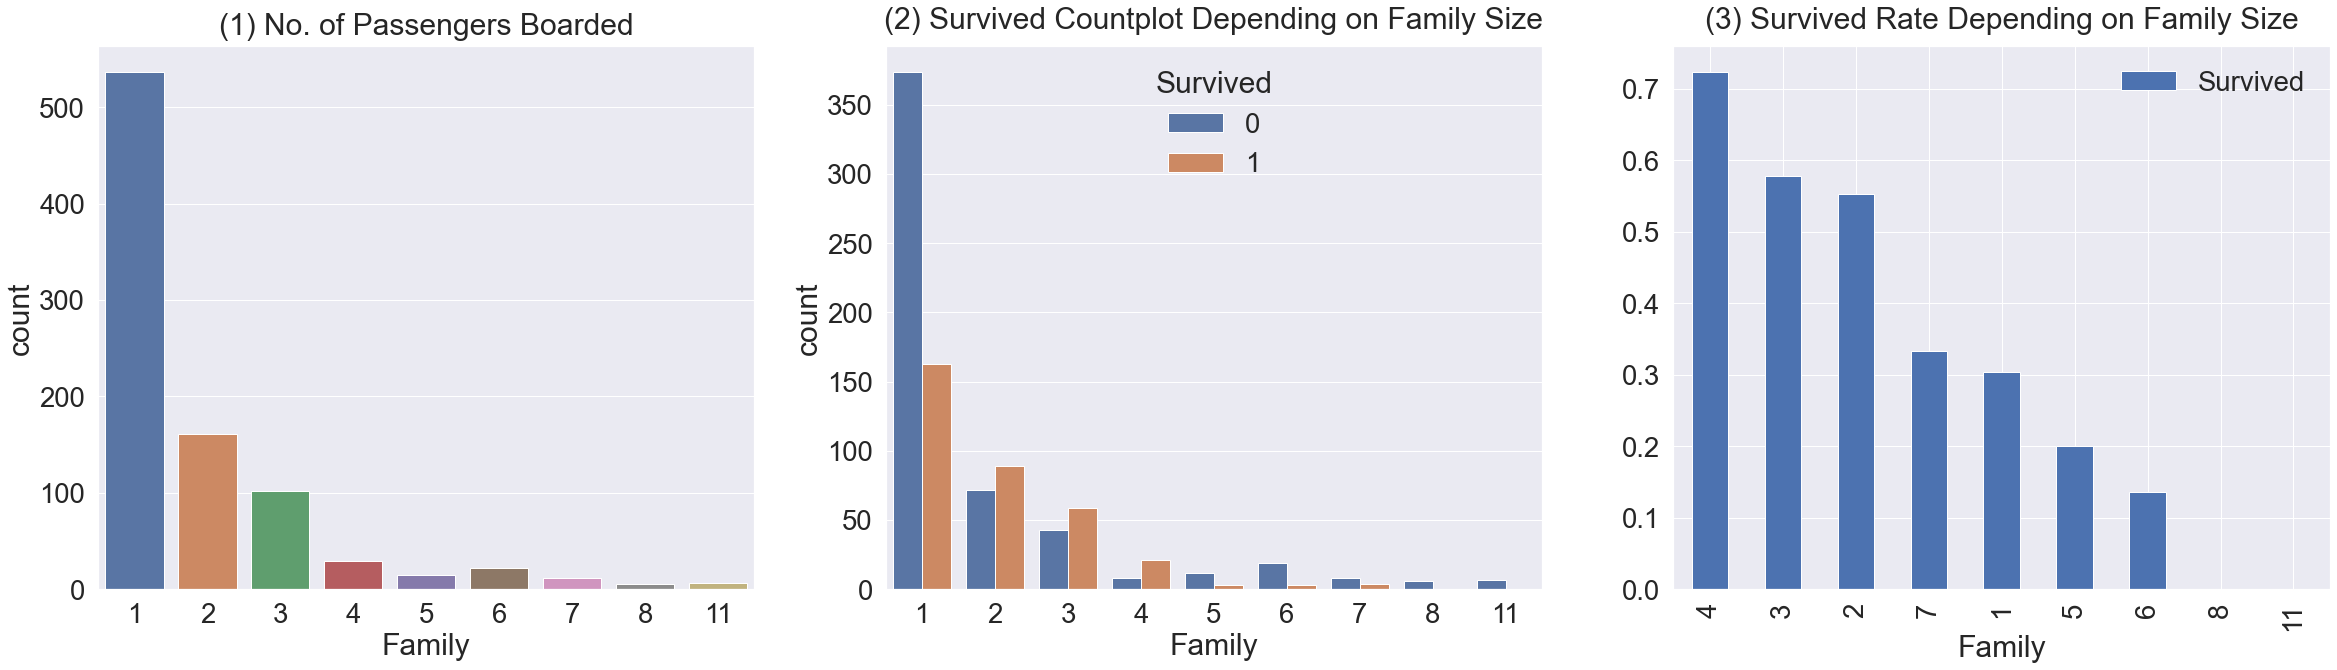

In [159]:
f, ax = plt.subplots(1, 3, figsize = (40, 10))
sns.countplot('Family', data = df_train, ax = ax[0])
ax[0].set_title("(1) No. of Passengers Boarded", y = 1.01)

sns.countplot('Family', hue = 'Survived', data = df_train, ax = ax[1])
ax[1].set_title("(2) Survived Countplot Depending on Family Size", y = 1.02)

df_train[['Family', 'Survived']].groupby(['Family'], as_index = True).mean().sort_values(by = 'Survived', ascending = False).plot.bar(ax = ax[2])
ax[2].set_title("(3) Survived Rate Depending on Family Size", y = 1.02)

plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()

## 2.8 Fare

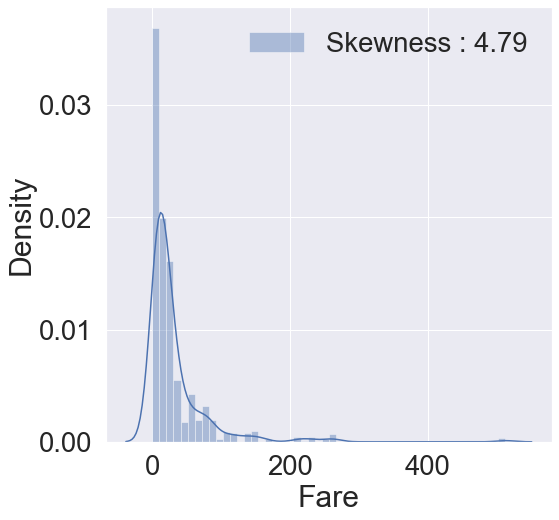

In [161]:
fig, ax = plt.subplots(1, 1, figsize = (8, 8))
g = sns.distplot(df_train['Fare'], label = "Skewness : {:.2f}".format(df_train['Fare'].skew()), ax = ax)
g = g.legend(loc = 'best')

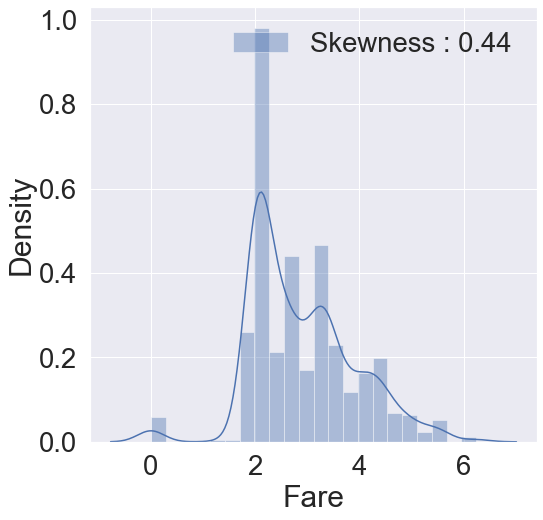

In [162]:
df_train['Fare'] = df_train['Fare'].map(lambda i : np.log(i) if i > 0 else 0)
fig, ax = plt.subplots(1, 1, figsize = (8, 8))
g = sns.distplot(df_train['Fare'], label = "Skewness : {:.2f}".format(df_train['Fare'].skew()), ax = ax)
g = g.legend(loc = 'best')

## 2.9 Cabin

## 2.10 Ticket

In [163]:
df_train['Ticket'].value_counts()

CA. 2343            7
1601                7
347082              7
CA 2144             6
347088              6
                   ..
244278              1
4579                1
STON/O2. 3101290    1
250648              1
113807              1
Name: Ticket, Length: 681, dtype: int64